In [26]:
import os 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import h5py
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [83]:
!make

mpicxx -Wall -Wwrite-strings -Wno-strict-aliasing -Wno-unknown-pragmas -fstack-protector -fno-stack-check -fvisibility=hidden -g   -std=c++14  -I/Users/eduardogrossi/pets/arch-darwin-c-debug/include -I/Users/eduardogrossi/pets/include -I/usr/local/Cellar/gsl/2.6/include  -c -o 3Dheat.o 3Dheat.cxx
mpicxx -Wall -Wwrite-strings -Wno-strict-aliasing -Wno-unknown-pragmas -fstack-protector -fno-stack-check -fvisibility=hidden -g   -std=c++14  -I/Users/eduardogrossi/pets/arch-darwin-c-debug/include -I/Users/eduardogrossi/pets/include -I/usr/local/Cellar/gsl/2.6/include -L/Users/eduardogrossi/pets/arch-darwin-c-debug/lib -L/usr/local/Cellar/gsl/2.6/lib  -Wl,-rpath,/Users/eduardogrossi/pets/arch-darwin-c-debug/lib  -Wl,-rpath,/usr/local/Cellar/gsl/2.6/lib  -o 3Dheat.exe 3Dheat.o -lpetsc -lgsl -lgslcblas -lm -lm -lstdc++


In [84]:
!mpiexec -n 1 3Dheat.exe 

 hx = 0.0666667, hy = 0.0666667
Timestep 0: step size = 0.05, time = 0.
Timestep 1: step size = 0.05, time = 0.05
Timestep 2: step size = 0.05, time = 0.1
Timestep 3: step size = 0.05, time = 0.15
Timestep 4: step size = 0.05, time = 0.2
Timestep 5: step size = 0.05, time = 0.25
Timestep 6: step size = 0.05, time = 0.3
Timestep 7: step size = 0.05, time = 0.35
Timestep 8: step size = 0.05, time = 0.4
Timestep 9: step size = 0.05, time = 0.45
Timestep 10: step size = 0.05, time = 0.5
Timestep 11: step size = 0.05, time = 0.55
Timestep 12: step size = 0.05, time = 0.6
Timestep 13: step size = 0.05, time = 0.65
Timestep 14: step size = 0.05, time = 0.7
Timestep 15: step size = 0.05, time = 0.75
Timestep 16: step size = 0.05, time = 0.8
Timestep 17: step size = 0.05, time = 0.85
Timestep 18: step size = 0.05, time = 0.9
Timestep 19: step size = 0.05, time = 0.95
Timestep 20: step size = 0.05, time = 1.


In [86]:
with h5py.File('output.h5','r') as output:
    print(list(output.keys()))
    sol=output["Timestepsolution"]["solution"]
    print("Type of sol", type(sol),sol.shape) 
    dset=sol[:,:,:,:]
    print("Type of dset", type(dset),dset.shape) 
    tcenter=dset[:,8,8,8,1:4]

['Timestepsolution']
Type of sol <class 'h5py._hl.dataset.Dataset'> (21, 16, 16, 16, 4)
Type of dset <class 'numpy.ndarray'> (21, 16, 16, 16, 4)


In [82]:
def f(i):
    plt.contourf(dset[i,:,:,8,1])
   
    plt.show()

interactive_plot = interactive(f, i=(0, 10,1))
interactive_plot

interactive(children=(IntSlider(value=5, description='i', max=10), Output()), _dom_classes=('widget-interact',…

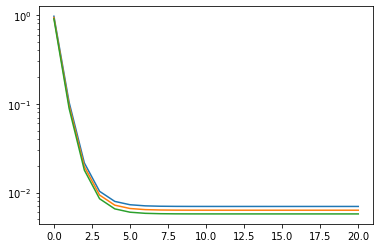

In [87]:
plt.plot(tcenter)
plt.yscale('log')

### 